
2.30Consider the data in Problem 2.12 and assume that steam usage and average temperature are jointly normally distributed.
df cols 

   Temp  Usage/1000
0    21      185.79
1    24      214.47
2    32      288.03
3    47      424.84
4    50      454.68


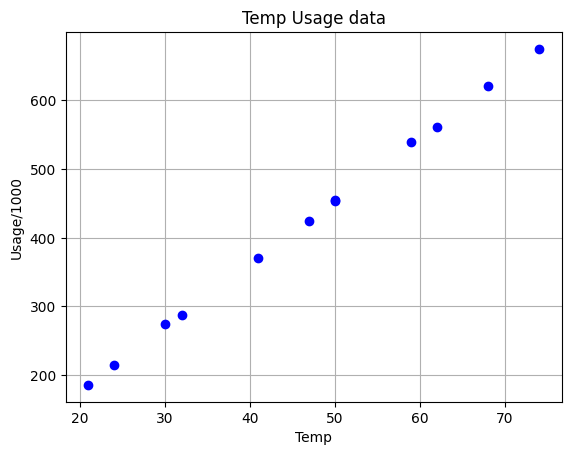

 

 Sample Size (N): (12,)
Select alpha value (α): 0.05
Your alpha value is (α): 0.05
Enter hypothesis value H0: 0.5
Your hypothesis is H0: 0.5
 
t-statistic = 257.47213779634
p-value = 1.9208699002973054e-20
Slope (w)(β1) = 9.208467815049863
Bias (b)(β0) = -6.332086733151925

a.Find the correlation between steam usage and monthly average ambient temperature.

Regression Line:  y = -6.332086733151925 + 9.208β
Correlation Coeff (R):  0.9999325511826972
"R square (Fit)":  0.9998651069147373
 

b. Test the hypothesis that ρ = 0

c. Test the hypothesis that ρ = 0.5

Your hypothesis is H0: 0.5

Reject the H0 hypothesis. There is significant evidence that w is different from 0.5

d. Find a 99% CI for ρ

99.0  percent confidence interval : (9.282911630959552, 9.134023999140174)
 


Text(1, 1, '\nR: 0.9999\nR^2: 0.9999\ny = -6.332 + 9.208X')

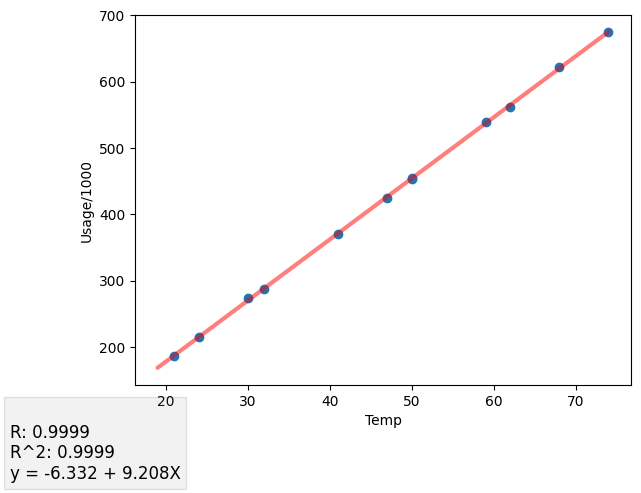

In [1]:
from numpy.ma.core import var
from scipy.stats import t

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#dataframe (df)
url='https://raw.githubusercontent.com/ramirezramiro/linear-reg/main/Linear-Reg-Data/2-30.csv'
df=pd.read_csv(url)

print("\n2.30\
Consider the data in Problem 2.12 and assume that steam usage and average \
temperature are jointly normally distributed.")

#Select df cols
print("df cols \n")
specific_columns=df[["Temp","Usage/1000"]]
print(specific_columns.head())

X = specific_columns['Temp']
Y = specific_columns['Usage/1000']

#print the plot of X-Y
plt.plot(X, Y, 'bo')
plt.grid(True)
plt.xlabel('Temp')
plt.ylabel('Usage/1000')
plt.title('Temp Usage data')
plt.show()
print(" ")

#Store the sample size (N) 
N = len(X)
print('\n Sample Size (N): ' + str(X.shape))
# Prompt the user to enter a float value
alpha = float(input("Select alpha value (α): "))

# Print the value entered by the user
print("Your alpha value is (α):", alpha)
#Linear Regression Steps

# Prompt the user to enter a float value
H0 = float(input("Enter hypothesis value H0: "))

# Print the value entered by the user
print("Your hypothesis is H0:", H0)

def lin_reg (X, Y):

  #Step2. Calculate the mean of each value using numpy np.mean function
  mean_x = np.mean(X)
  mean_y = np.mean(Y)

  #Step3. Calculate the variance of X-Y using numpy np.var
  var_x = np.var(X)
  var_xy = np.sum((X - mean_x) * (Y - mean_y)) / N

  #Step4. Calculate slope (regression coeff (w)) (β1)
  w = var_xy / var_x

  #Step5. Calculate bias (b) (β0)
  b = mean_y - (w * mean_x)
  
  # Calculate the standard error of w 
  se = np.sqrt(np.sum((Y - (w*X + b))**2) / (N - 2)) / np.sqrt(np.sum((X - np.mean(X))**2))

  # Calculate the t-statistic and p-value
  t_stat = (w-H0) / se
  p_val = 2 * t.cdf(-np.abs(t_stat), N-2)

  #Return Linear Regression Formula, 3 decimals rounded
  reg_line = 'y = {} + {}β'.format(b, round(w, 3))
    
 
  
  print("t-statistic = " + str(t_stat))
  print("p-value = " + str(p_val))

  print("Slope (w)(β1) = " + str(w))
  print("Bias (b)(β0) = " + str(b)) 

  return (b, w, reg_line, t_stat, p_val, se)
 
def corr_coeff (X,Y):
  num_corr = (N * (X*Y).sum()) - (X.sum() * Y.sum())
  den_corr = np.sqrt((N * (X**2).sum() - X.sum()**2) * (N * (Y**2).sum() - Y.sum()**2))
  R = num_corr / den_corr
  return R
print(" ")
b, w, reg_line, t_stat, p_val, se = lin_reg(X, Y)
print("\na.Find the correlation between steam usage and monthly average ambient temperature.\n")
print('Regression Line: ', reg_line)
R = corr_coeff(X, Y)

print('Correlation Coeff (R): ', R)
print('"R square (Fit)": ', R**2)
print(" ")
def conf_int (se):
  
  # calculate t-value for 95% confidence interval with N-1 degrees of freedom
  t_value = t.ppf(alpha/2, N-1)

  lower_bound = w - (t_value * se)
  upper_bound = w + (t_value * se)
  
  return (lower_bound, upper_bound)

print("\nb. Test the hypothesis that ρ = 0")
print("\nc. Test the hypothesis that ρ = 0.5")

print("\nYour hypothesis is H0:", H0)

# test the hypothesis at alpha significance level
if p_val < alpha:
    print('\nReject the H0 hypothesis. There is significant evidence that w is different from', H0)
else:
    print('\nFail to reject the H0 hypothesis. There is not enough evidence to conclude that w is different from', H0)

print("\nd. Find a 99% CI for ρ\n")
print_conf_in = conf_int (se)
print( (1-0.01)*100, " percent confidence interval :", print_conf_in)
print (" ")
xs = range(19, 75)
ys = w * xs + b
# Plot the regression function
plt.scatter(X, Y)
plt.plot(xs, ys, c='r', linewidth=3, alpha=.5, solid_capstyle='round')
plt.xlabel("Temp")
plt.ylabel("Usage/1000")
text = '''
R: {}
R^2: {}
y = {} + {}X'''.format(round(R, 4), 
                       round(R**2, 4),
                       round(b, 3),
                       round(w, 3))
plt.text(x=1, y=1, s=text, fontsize=12, bbox={'facecolor': 'grey', 'alpha': 0.1, 'pad': 4})